# Реализация табличной Q-функции

Будем допускать, что Q-функция уже дана, и мы лишь учимся ей пользоваться для совершения оптимальных действий

In [1]:
import numpy as np
import gym

import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

# Создание игровой среды
Создадим эмулятор Frozen Lake.

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=False, apply_api_compatibility=False)

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


# Q-функция
Создадим Q-функцию. По сути, это просто двумерная таблица размерности [количество состояний, количество действий].
Пока что мы не знаем, как получить значения для Q-функции, так что заполняем всю таблицу случайными значениями (просто для демо).

In [3]:
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)
print(Q)

[[0.53363387 0.38218032 0.18992156 0.30157196]
 [0.27728038 0.19895884 0.52079776 0.91433393]
 [0.39032782 0.82530976 0.91085616 0.55093131]
 [0.12887392 0.68466187 0.38713289 0.02002459]
 [0.83348543 0.24849723 0.86301414 0.77000589]
 [0.74514792 0.35637153 0.38821574 0.98559532]
 [0.6728371  0.92699645 0.16632526 0.44685214]
 [0.9714178  0.43648447 0.11216798 0.41873979]
 [0.84755422 0.12246743 0.1493564  0.3535358 ]
 [0.32004193 0.47760407 0.74189843 0.20862795]
 [0.82539162 0.57665782 0.86017112 0.72854425]
 [0.34829441 0.79808758 0.94879196 0.68094953]
 [0.90874965 0.76769146 0.1325026  0.70757089]
 [0.3831409  0.06087931 0.56409244 0.63772319]
 [0.87070354 0.41307602 0.37935511 0.2272364 ]
 [0.64069315 0.35651154 0.54249813 0.9865859 ]]


# Запуск симуляции
Запустим симуляция для FrozenLake так же, как мы делали ранее. Но только на этот раз мы будем использовать не случайную стратегию,
а стратегию, основанную на Q-функции.
Оптимальная политика (при условии оптимальности Q-функции) будет следующая: для текущего состояния s выбирать такое действие,
a, при котором значение Q(s, a) максимально.

a = np.argmax(Q[s, :])

In [4]:
s = env.reset()[0]

for _ in range(100):
    env.render()
    a = np.argmax(Q[s, :]) # выбираем оптимальной действие
    s, r, done, _ = env.step(a)[:4]
    if done:
        env.render()
        print('Final reward = {}'.format(r))
        break
        
env.close()        

# Реализация табличного Q-Learning

## Параметры обучения
* lr - скорость обучения (в теории это был параметр $\alpha$)
* $\gamma$ - параметр дисконтирования
* NUM_EPISODES - сколько всего эпизодов игры булем осуществлять
* MAX_STEPS - максимальное количество шагов в рамках одного эпизода. Эпизод может закончиться и раньше. Это ограничение
нужно, если агент зашел в какой-то тупик и там застрял. Или для бесконечных игр/симуляций.

In [5]:
lr = .8 # learning rate
gamma = .95 # параметр дисконтирования

NUM_EPISODES = 50 # число эпизодов для обучения
MAX_STEPS = 100 # максимальное число шагов в эпизоде

# Обучение Q-функции

In [6]:
pathLenList = [] # длины траекторий по эпизодам
totalRewardList = [] # суммарные награды по эпизодам

# Инициализация Q-функции (таблицы)
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)

for i in range(NUM_EPISODES):
    s = env.reset()[0]
    
    totalReward = 0
    step = 0
    
    while step < MAX_STEPS:
        step += 1
        
        # Выбор действия по текущей политике
        a = np.argmax(Q[s, :])
        
        # Сделать шаг
        s1, r, _, done = env.step(a)[:4]
        
#         done = min(trunc, done)
        
        # Новое (целевое) значение Q-функции
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1, :])
        
        # Обновление Q-функции
        Q[s, a] = (1 - lr) * Q[s, a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        # Если конец эпизода
        if done:
            break
            
        pathLenList.append(step)
        totalRewardList.append(totalReward)
        print('Episode {}: Total reward = {}'.format(i, totalReward))
            

Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0: Total reward = 0.0
Episode 0:

In [7]:
Q

array([[6.85569789e-02, 6.88822798e-02, 7.73780938e-01, 6.81183291e-02],
       [1.77160746e-01, 6.62897041e-02, 8.14506250e-01, 1.83848818e-01],
       [1.92777794e-01, 8.57375000e-01, 1.25923406e-02, 1.93206906e-01],
       [6.15078457e-01, 8.50802371e-01, 4.58739631e-01, 8.42313188e-01],
       [6.82683674e-02, 5.57222119e-02, 4.39502801e-02, 2.57395091e-01],
       [1.25593525e-03, 2.59348166e-04, 1.25544394e-03, 4.49364745e-04],
       [1.96597213e-01, 9.02500000e-01, 9.07665004e-02, 1.94848144e-01],
       [2.61929407e-03, 9.39844062e-03, 1.28917549e-02, 1.27865047e-02],
       [1.25298049e-01, 8.44303758e-04, 1.92255838e-01, 1.10170901e-01],
       [1.95129696e-01, 1.95544309e-01, 1.88206437e-01, 1.09932386e-01],
       [1.95081163e-01, 9.50000000e-01, 7.37126110e-02, 5.79935704e-02],
       [5.15622008e-03, 1.11293253e-03, 5.40858250e-03, 5.52322506e-03],
       [1.30300694e-02, 9.10923496e-03, 1.28196796e-02, 2.62753412e-03],
       [1.02647409e-01, 6.43679527e-02, 1.92165441e

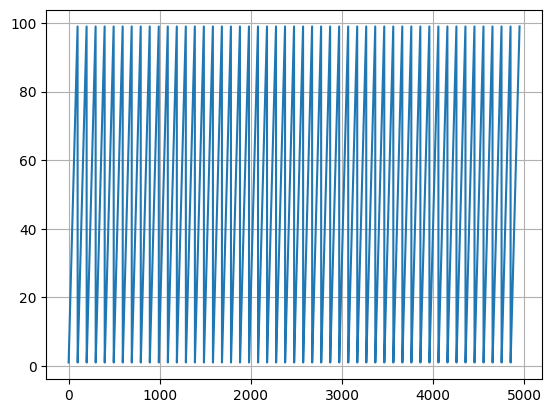

In [8]:
plt.plot(pathLenList)
plt.grid()

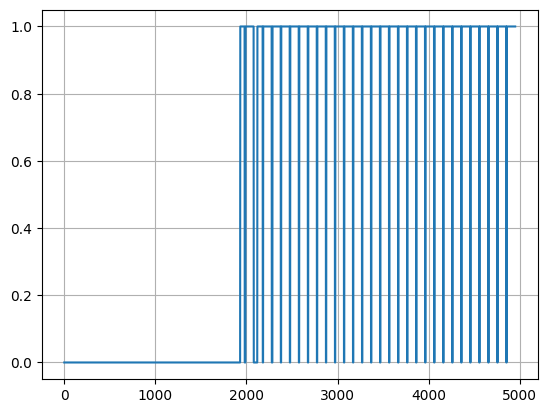

In [9]:
plt.plot(totalRewardList)
plt.grid()

In [10]:
totalReward = 0
s = env.reset()[0]

for _ in range(100):
    env.render()
    a = np.argmax(Q[s, :]) # выбираем оптимальное действие
    s, r, done, trunc = env.step(a)[:4]
    totalReward += r
    if done:
        env.render()
        break
        
env.close()
print('Total reward = {}'.format(totalReward))

Total reward = 1.0
